# Analisi strutturale dei datasets

In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.colors
import re
from itertools import combinations
import shutil
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from itertools import combinations
import string
import collections

In [2]:
lilla = "#c8a2c8"
color_of_bar1 = "#c8a2c8"
color_of_bar2 = "#6495ED"
color_of_edge = "#000000"

In [3]:
matrix = np.array([[149030, 34],[7442, 12]])
norm = matplotlib.colors.Normalize(matrix.min(), matrix.max())
boundaries = [value for value in matrix.flatten().tolist()]
list.sort(boundaries)
colors = [[norm(boundaries[0]), "#dcc4dc"], 
          [norm(boundaries[1]), "#c8a2c8"], 
          [norm(boundaries[2]), "#93779c"], 
          [norm(boundaries[3]), "#6c4675"]]
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

In [4]:
dataset_path = "..\\..\\Dataset\\DatasetJSON\\datasets.json"

### Import datasets ed dati

In [5]:
with open(dataset_path, 'r', encoding='utf-8') as f:
    json_object = json.loads(f.read())
    f.close()

In [6]:
# dato un df restituisce numero di righe, colonne e celle
def extract_data_from_df(df):
    return {
        "rows": df.shape[0],
        "columns": df.shape[1],
        "cells": df.shape[0] * df.shape[1]
    }

In [7]:
info_datasets = []
for i in range(0, len(json_object)):
    df = pd.read_json(json_object[i]["dataset"], orient="index", encoding="utf-8")
    info = extract_data_from_df(df)
    info_datasets.append([
        json_object[i]["group_name"],
        json_object[i]["dataset_name"],
        info["rows"],
        info["columns"],
        info["cells"]
    ])

In [8]:
# costruisce un df a partire da un array di array e un numero c che rappresenta la colonna su cui ordinare
# reverse serve a ordinare in senso crescente o descrescente
def get_info_order_by(list_of_info, c, reverse=False):
    sorted_list = sorted(list_of_info, key = lambda x: x[c], reverse=reverse)
    df = pd.DataFrame(sorted_list, columns=["group_name", "dataset_name", "rows", "columns", "cells"])
    return df

In [9]:
df_info = get_info_order_by(info_datasets, 1, True)
display(df_info)

,group_name,dataset_name,rows,columns,cells
0,02-GioPonSpiz,wikipedia,2664,5,13320
1,05-MalPatSaj,wikipedia,3111,7,21777
2,06-MarScoToc,wikipedia,619,5,3095
3,10-DeBiGa,wikipedia,1002,13,13026
4,00-avengers,valuetoday,10682,18,192276
5,02-GioPonSpiz,valuetoday,10680,6,64080
6,03-gren,valuetoday,10682,10,106820
7,04-iGMM,valuetoday,10000,12,120000
8,07-silvestri,valuetoday,1000,9,9000
9,08-slytherin,valuetoday,10000,8,80000


In [10]:
sum(df_info["rows"])

185598

### Plot numero di valori distinti e nulli per colonna, per ogni dataset

In [11]:
# funzione di utilita per count_type_in_list(), serve a convertire una stringa in int o float
def maybeMakeNumber(s):
    if s is np.nan:
        return None
    if s is pd.NA:
        return None
    else:
        if not isinstance(s, float):
            try:
                return int(s)
            except:
                try:
                    return float(s)
                except:
                    return s
        else:
            return s

In [12]:
# conta il numero di int, float e str in una lista di stringhe
def count_type_in_list(l):
    info = {}
    converted = list(map(maybeMakeNumber, l))
    converted = [0 if isinstance(x, int) else x for x in converted]
    converted = [1 if isinstance(x, float) else x for x in converted]
    converted = [2 if isinstance(x, str) else x for x in converted]
    info["#int"] = converted.count(0)
    info["#float"] = converted.count(1)
    info["#str"] = converted.count(2)
    return info

In [13]:
# estrazione dati da un dataframe
def extract_data_from_df(df):
    info = {}
    info["#righe"] = df.shape[0]
    info["#colonne"] = df.shape[1]
    info["#celle"] = df.shape[0] * df.shape[1]
    info["#celle_nulle"] = df.isnull().sum().sum()
    info["#righe_con_celle_nulle"] = (df.isnull().sum(axis=1) != 0).sum()
    info["#colonne_con_celle_nulle"] = (df.isnull().sum(axis=0) != 0).sum()
    info["#celle_vuote"] = (df == '').sum().sum()
    info["#righe_con_celle_vuote"] = ((df == '').sum(axis=1) != 0).sum()
    info["#colonne_con_celle_vuote"] = ((df == '').sum(axis=0) != 0).sum()
    info["#celle_int"] = 0
    info["#celle_float"] = 0
    info["#celle_str"] = 0
    info["#colonne_int"] = 0
    info["#colonne_float"] = 0
    info["#colonne_str"] = 0
    for key in df:
        column = list(df[key])
        info_type = count_type_in_list(column)
        not_value_column = len(list(filter(lambda x: x is not np.nan and x is not pd.NA, column)))
        info["#celle_int"] += info_type["#int"]
        info["#celle_float"] += info_type["#float"]
        info["#celle_str"] += info_type["#str"]
        if not_value_column == info_type["#int"]:
            info["#colonne_int"] += 1
        elif not_value_column == info_type["#float"]:
            info["#colonne_float"] += 1
        elif not_value_column == info_type["#str"]:
            info["#colonne_str"] += 1

    info["#valori_nulli_per_colonna"] = dict(df.apply(lambda x: pd.Series(x).isnull().sum()))
    info["#valori_distinti_per_colonna"] = dict(df.apply(lambda x: pd.Series(x).explode().nunique()))  
    
    return info

In [14]:
tables = {}
for i in range(0, len(json_object)):
    df = pd.read_json(json_object[i]["dataset"], orient="index", encoding="utf-8")
    tables["table-" + str(i)] = extract_data_from_df(df)

In [15]:
info_tables = {
    "#tabelle": 0,
    "#tabelle_con_celle_vuote": 0,
    "#tabelle_senza_celle_vuote": 0,
    "#tabelle_con_celle_nulle": 0,
    "#tabelle_senza_celle_nulle": 0
}
info_rows = {
    "#righe": 0,
    "#righe_medie_per_tabella": 0,
    "#righe_con_celle_vuote": 0,
    "#righe_con_celle_nulle": 0,
    "#righe_con_celle_non_vuote": 0,
    "#righe_con_celle_non_nulle": 0
}
info_columns = {
    "#colonne": 0,
    "#colonne_medie_per_tabella": 0,
    "#colonne_int": 0,
    "#colonne_float": 0,
    "#colonne_str": 0,
    "#colonne_misc": 0,
    "#colonne_con_celle_vuote": 0,
    "#colonne_con_celle_nulle": 0,
    "#colonne_con_celle_non_vuote": 0,
    "#colonne_con_celle_non_nulle": 0
}
info_cells = {
    "#celle": 0,
    "#celle_int": 0,
    "#celle_float": 0,
    "#celle_str": 0,
    "#media_celle_vuote_per_tabella": 0,
    "#media_celle_nulle_per_tabella": 0,
    "#celle_vuote": 0,
    "#celle_non_vuote": 0,
    "#celle_nulle": 0,
    "#celle_non_nulle": 0
}

n_rows_dict = {}
n_columns_dict = {}

In [16]:
info_tables["#tabelle"] = len(tables)

for key, info in tables.items():

    info_rows["#righe"] += info["#righe"]
    info_rows["#righe_con_celle_vuote"] += info["#righe_con_celle_vuote"]
    info_rows["#righe_con_celle_nulle"] += info["#righe_con_celle_nulle"]

    info_columns["#colonne"] += info["#colonne"]
    info_columns["#colonne_int"] += info["#colonne_int"]
    info_columns["#colonne_float"] += info["#colonne_float"]
    info_columns["#colonne_str"] += info["#colonne_str"]
    info_columns["#colonne_con_celle_vuote"] += info["#colonne_con_celle_vuote"]
    info_columns["#colonne_con_celle_nulle"] += info["#colonne_con_celle_nulle"]

    info_cells["#celle"] += info["#celle"]
    info_cells["#celle_int"] += info["#celle_int"]
    info_cells["#celle_float"] += info["#celle_float"]
    info_cells["#celle_str"] += info["#celle_str"]
    info_cells["#celle_vuote"] += info["#celle_vuote"]
    info_cells["#celle_non_vuote"] += info["#celle"] - info["#celle_vuote"]
    info_cells["#celle_nulle"] += info["#celle_nulle"]
    info_cells["#celle_non_nulle"] += info["#celle"] - info["#celle_nulle"]

    if info["#celle_vuote"] > 0:
        info_tables["#tabelle_con_celle_vuote"] += 1
    if info["#celle_nulle"] > 0:
        info_tables["#tabelle_con_celle_nulle"] += 1

    if info["#righe"] not in n_rows_dict.keys():
        n_rows_dict[info["#righe"]] = 0
    if info["#colonne"] not in n_columns_dict.keys():
        n_columns_dict[info["#colonne"]] = 0
    n_rows_dict[info["#righe"]] += 1
    n_columns_dict[info["#colonne"]] += 1

info_tables["#tabelle_senza_celle_vuote"] = info_tables["#tabelle"] - info_tables["#tabelle_con_celle_vuote"]
info_tables["#tabelle_senza_celle_nulle"] = info_tables["#tabelle"] - info_tables["#tabelle_con_celle_nulle"]

info_rows["#righe_con_celle_non_vuote"] = info_rows["#righe"] - info_rows["#righe_con_celle_vuote"]
info_rows["#righe_con_celle_non_nulle"] = info_rows["#righe"] - info_rows["#righe_con_celle_nulle"]
info_rows["#righe_medie_per_tabella"] = info_rows["#righe"] / info_tables["#tabelle"]

info_columns["#colonne_misc"] = info_columns["#colonne"] - (
        info_columns["#colonne_int"] + info_columns["#colonne_float"] + info_columns["#colonne_str"])
info_columns["#colonne_con_celle_non_vuote"] = info_columns["#colonne"] - info_columns["#colonne_con_celle_vuote"]
info_columns["#colonne_con_celle_non_nulle"] = info_columns["#colonne"] - info_columns["#colonne_con_celle_nulle"]
info_columns["#colonne_medie_per_tabella"] = info_columns["#colonne"] / info_tables["#tabelle"]

info_cells["#media_celle_vuote_per_tabella"] = info_cells["#celle_vuote"] / info_tables["#tabelle"]
info_cells["#media_celle_nulle_per_tabella"] = info_cells["#celle_nulle"] / info_tables["#tabelle"]

r = collections.OrderedDict(sorted(n_rows_dict.items()))
n_rows_dict = dict(r)
c = collections.OrderedDict(sorted(n_columns_dict.items()))
n_columns_dict = dict(c)

In [17]:
color_of_bar = "#C8A2C8"
color_of_edge = "#000000"

counter = 0

def make_path(file_name):
    global counter
    counter += 1
    return ".\\plot\\" + str(counter) + "-" + file_name

In [18]:
def plot_bar(keys, values, title, dim):
    file_name = "".join(title.lower()).replace(" ", "_")
    labels = ["{:,}".format(elem) for elem in values]
    labels = list(map(lambda x: x.replace(',', ' '), labels))

    plt.figure(figsize=dim)
    plt.grid(color=color_of_edge, linestyle='-', linewidth=0.2, axis="y")
    plt.title(title)
    plt.yticks(values, labels)
    plt.bar(keys, values, width=0.5, color=color_of_bar, edgecolor=color_of_edge, linewidth=1, align='center')
    plt.savefig(make_path(file_name), bbox_inches='tight', transparent=True)
    plt.show()

In [19]:
def plot_distribution(dict_of_distribution, title, xlabel, ylabel, dist, dim, type_of_plot):
    plt.figure(figsize=dim)
    plt.grid(color=color_of_edge, linestyle='-', linewidth=0.2, axis="y")

    file_name = "".join(title.lower()).replace(" ", "_")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    list1 = list(range(0, len(dict_of_distribution)))
    list2 = list(map(str, dict_of_distribution.keys()))
    list1 = list1[slice(0, len(list1), dist)]
    list2 = list2[slice(0, len(list2), dist)]
    plt.xticks(list1, list2, rotation=90)

    x = list(map(str, dict_of_distribution.keys()))
    y = list(dict_of_distribution.values())

    if type_of_plot:
        plt.bar(x, y, width=1.0, color=color_of_bar, align='center')
        plt.plot(x, y, linewidth=1, color=color_of_edge)
    else:
        plt.bar(x, y, width=1.0, color=color_of_bar, edgecolor=color_of_edge, linewidth=1, align='center')

    plt.savefig(make_path(file_name), bbox_inches='tight', transparent=True)
    plt.show()

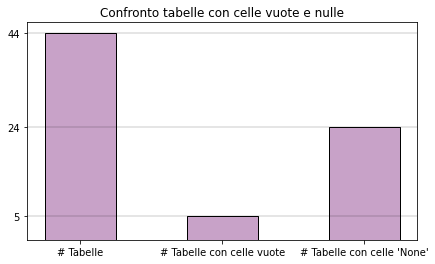

In [20]:
keys = ["# Tabelle", "# Tabelle con celle vuote", "# Tabelle con celle 'None'"]
values = [info_tables["#tabelle"], info_tables["#tabelle_con_celle_vuote"], info_tables["#tabelle_con_celle_nulle"]]
title = "Confronto tabelle con celle vuote e nulle"
dim = (7, 4)
plot_bar(keys, values, title, dim)

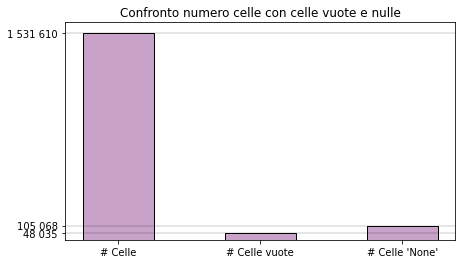

In [21]:
keys = ["# Celle", "# Celle vuote", "# Celle 'None'"]
values = [info_cells["#celle"], info_cells["#celle_vuote"], info_cells["#celle_nulle"]]
title = "Confronto numero celle con celle vuote e nulle"
dim = (7, 4)
plot_bar(keys, values, title, dim)

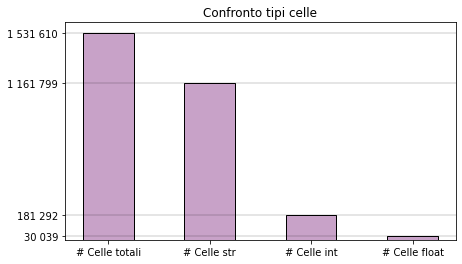

In [22]:
keys = ["# Celle totali", "# Celle str", "# Celle int", "# Celle float"]
values = [info_cells["#celle"], info_cells["#celle_str"], info_cells["#celle_int"], info_cells["#celle_float"]]
title = "Confronto tipi celle"
dim = (7, 4)
plot_bar(keys, values, title, dim)

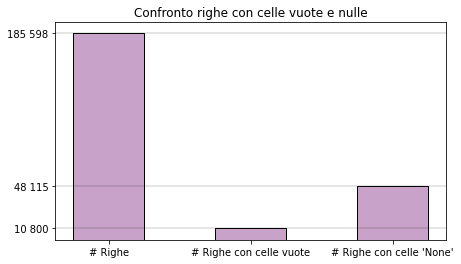

In [23]:
keys = ["# Righe", "# Righe con celle vuote", "# Righe con celle 'None'"]
values = [info_rows["#righe"], info_rows["#righe_con_celle_vuote"], info_rows["#righe_con_celle_nulle"]]
title = "Confronto righe con celle vuote e nulle"
dim = (7, 4)
plot_bar(keys, values, title, dim)

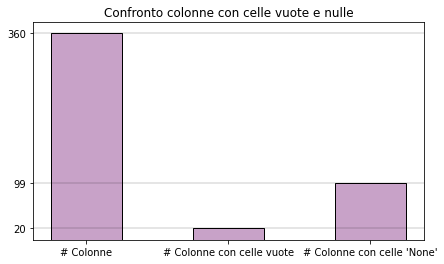

In [24]:
keys = ["# Colonne", "# Colonne con celle vuote", "# Colonne con celle 'None'"]
values = [info_columns["#colonne"], info_columns["#colonne_con_celle_vuote"],
          info_columns["#colonne_con_celle_nulle"]]
title = "Confronto colonne con celle vuote e nulle"
dim = (7, 4)
plot_bar(keys, values, title, dim)

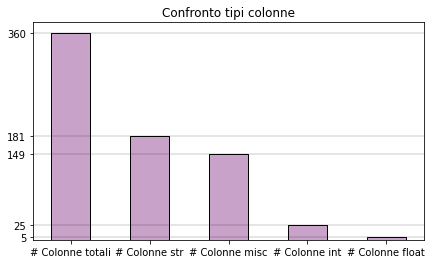

In [25]:
keys = ["# Colonne totali", "# Colonne str", "# Colonne misc", "# Colonne int", "# Colonne float"]
values = [info_columns["#colonne"], info_columns["#colonne_str"], info_columns["#colonne_misc"],
          info_columns["#colonne_int"], info_columns["#colonne_float"]]
title = "Confronto tipi colonne"
dim = (7, 4)
plot_bar(keys, values, title, dim)

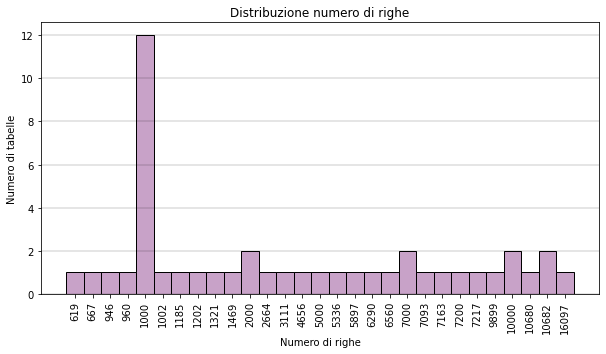

In [26]:
plot_distribution(n_rows_dict, "Distribuzione numero di righe", "Numero di righe", "Numero di tabelle", 1, (10, 5), False)

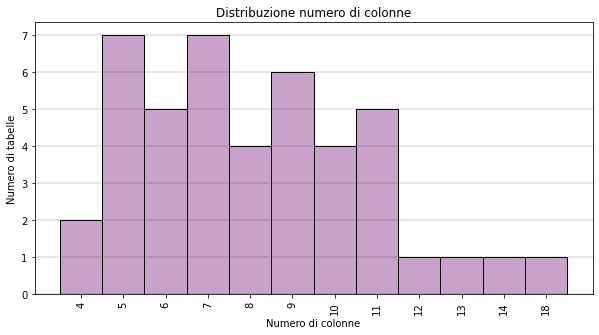

In [27]:
plot_distribution(n_columns_dict, "Distribuzione numero di colonne", "Numero di colonne", "Numero di tabelle", 1, (10, 5), False)

### Plot statistiche clusters

In [28]:
path_cluster = "..\\..\\Dataset\\ClusterParsed\\"

cluster_null = {}
cluster_uniq = {}

cluster_righe = {}
cluster_colonne = {}


for dirname in os.listdir(path_cluster):
    cluster = os.path.join(path_cluster, dirname)
    
    mean_null = []
    mean_uniq = []
    mean_r = []
    mean_c = []
    for filename in os.listdir(cluster):
        file = os.path.join(cluster, filename)
        df = pd.read_csv(file, encoding="utf-8")
        info = extract_data_from_df(df)
        
        r = info["#righe"]
        c = info["#colonne"]
        v_null = info["#valori_nulli_per_colonna"]
        v_uniq = info["#valori_distinti_per_colonna"]
        
        m_n = sum(v_null.values()) / c
        m_u = sum(v_uniq.values()) / c
        
        mean_null.append(m_n)
        mean_uniq.append(m_u)
        mean_r.append(r)
        mean_c.append(c)
    
    if dirname == "companiesmarketcap":
        dirname = "cmc"
    cluster_null[dirname] = sum(mean_null) / len(mean_null)
    cluster_uniq[dirname] = sum(mean_uniq) / len(mean_uniq)
    cluster_righe[dirname] = sum(mean_r) / len(mean_r)
    cluster_colonne[dirname] = sum(mean_c) / len(mean_c)
        

In [29]:
def plot_bar(keys, values, title, dim, colors):
    file_name = "".join(title.lower()).replace(" ", "_")
    #labels = ["{:,}".format(elem) for elem in values]
    #labels = list(map(lambda x: x.replace(',', ' '), labels))

    plt.figure(figsize=dim)
    plt.grid(color=color_of_edge, linestyle='-', linewidth=0.2, axis="y")
    plt.title(title)
    #plt.yticks(values, labels)
    plt.bar(keys, values, width=0.5, color=colors, edgecolor=color_of_edge, linewidth=1, align='center')
    plt.savefig(make_path(file_name), bbox_inches='tight', transparent=True)
    plt.show()

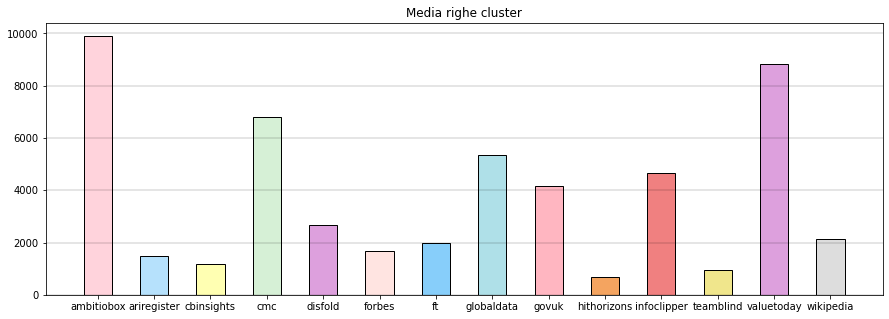

In [30]:
keys = list(cluster_righe.keys())
values = list(cluster_righe.values())
title = "Media righe cluster"
dim = (15, 5)
colors = ['#ffd3dc', '#b6e1fc', '#ffffb2', '#d6f0d6', '#dda0dd', '#ffe4e1', '#87cefa', '#afe0e8', '#ffb6c1', '#f4a460', '#f08080', '#f0e68c', '#dda0dd', '#dddddd']
plot_bar(keys, values, title, dim, colors)

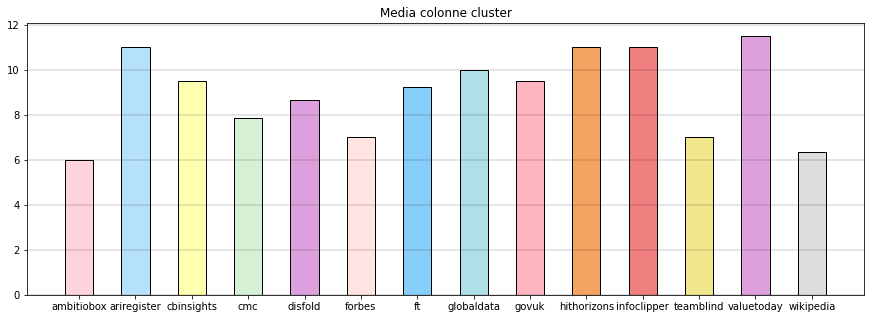

In [31]:
keys = list(cluster_colonne.keys())
values = list(cluster_colonne.values())
title = "Media colonne cluster"
dim = (15, 5)
colors = ['#ffd3dc', '#b6e1fc', '#ffffb2', '#d6f0d6', '#dda0dd', '#ffe4e1', '#87cefa', '#afe0e8', '#ffb6c1', '#f4a460', '#f08080', '#f0e68c', '#dda0dd', '#dddddd']
plot_bar(keys, values, title, dim, colors)

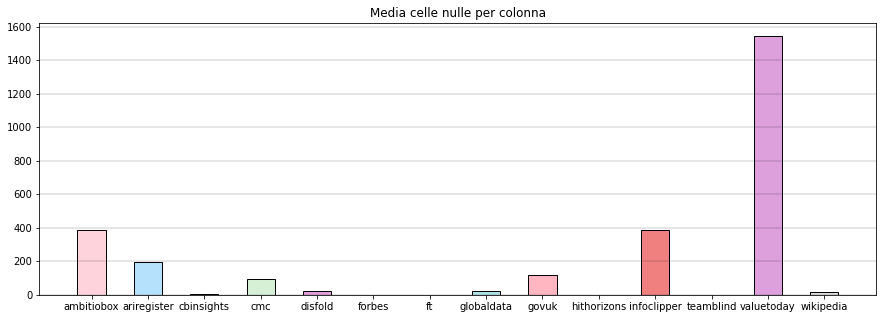

In [32]:
keys = list(cluster_null.keys())
values = list(cluster_null.values())
title = "Media celle nulle per colonna"
dim = (15, 5)
colors = ['#ffd3dc', '#b6e1fc', '#ffffb2', '#d6f0d6', '#dda0dd', '#ffe4e1', '#87cefa', '#afe0e8', '#ffb6c1', '#f4a460', '#f08080', '#f0e68c', '#dda0dd', '#dddddd']
plot_bar(keys, values, title, dim, colors)

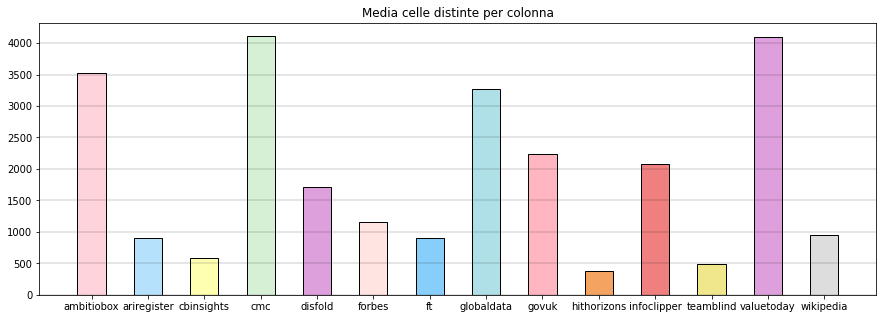

In [33]:
keys = list(cluster_uniq.keys())
values = list(cluster_uniq.values())
title = "Media celle distinte per colonna"
dim = (15, 5)
colors = ['#ffd3dc', '#b6e1fc', '#ffffb2', '#d6f0d6', '#dda0dd', '#ffe4e1', '#87cefa', '#afe0e8', '#ffb6c1', '#f4a460', '#f08080', '#f0e68c', '#dda0dd', '#dddddd']
plot_bar(keys, values, title, dim, colors)

### Word cloud

In [ ]:
for i in range(0, len(json_object)):
    
    df = pd.read_json(json_object[i]["dataset"], orient="index", encoding="utf-8")
    for column in list(df.columns):
        
        if column == "name":
        
            df[column] = df[column].fillna(value="")

            word_string = ""

            for val in df[column]:
                val = str(val)
                tokens = val.split()
                for token in tokens:
                    t = re.sub('[^A-Za-z]+', ' ', token)
                    t = t.lower()
                    other_tokens = t.split()
                    tmp = "".join(other_tokens)
                    if len(tmp) > 3:
                        word_string += tmp+" "

            with open('words.txt', 'a', encoding='utf-8') as f:
                f.write(word_string) 

In [ ]:
dict_frequent_term = {}
with open('words.txt', 'r', encoding='utf-8') as f:
    word_string = f.read() 
    for token in word_string.split():
        if token not in dict_frequent_term.keys():
            dict_frequent_term[token] = 0
        dict_frequent_term[token] += 1
dict_frequent_term = dict(sorted(dict_frequent_term.items(), key=lambda x: x[1], reverse=True))

In [ ]:
for x in [150000]:#[1000, 100, 50, 30, 10]:
    stop = {k: v for k, v in dict_frequent_term.items() if v > x}
    with open('words.txt', 'r', encoding='utf-8') as f:
        word_string = f.read() 

        plt.figure(figsize=(10,10))

        stop_words = list(STOPWORDS) + list(stop.keys())
        
        mask = np.array(Image.open("mask3.png"))
        
        wc = WordCloud(background_color="white", stopwords = stop_words, max_words=2000, max_font_size= 300,  width=1600, height=800, mask=mask)
        wc.generate(word_string)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis('off')
        plt.savefig(make_path(str(x)+"-wordcloud"), bbox_inches='tight', transparent=True)